<a href="https://colab.research.google.com/github/abh2050/Codes-/blob/master/Hands_on_ML_Chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
source activate myenv

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.6/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

['', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/site-packages']
Python version
3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


bash: line 1: activate: No such file or directory


Chapter 2

In [2]:
#ML
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()



Saving housing.csv to housing.csv


In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
housing_data = pd.read_csv("housing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


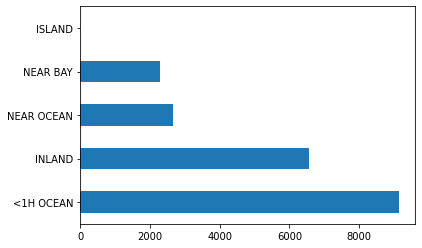

In [6]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


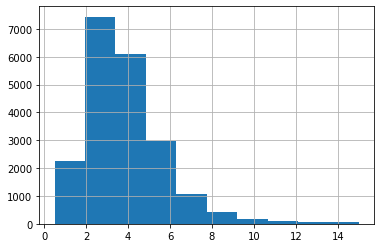

In [8]:
housing_data["median_income"].hist()

In [9]:
housing_data["income_cat"]= pd.cut(housing_data["median_income"],
                                   bins=[0,1.5,3.0,4.5,6, np.inf],
                                   labels=[1,2,3,4,5])
housing_data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

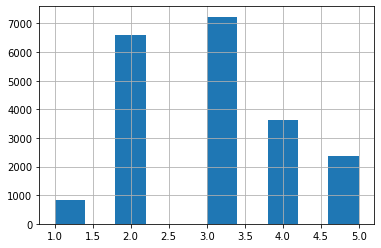

In [10]:
housing_data["income_cat"].hist()

In [11]:
y = housing_data["median_house_value"]
X= housing_data.drop("median_house_value",axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


Splits the data into 33% and 66% for Training and Testing

In [12]:
#Split data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13914,-116.06,34.15,15.0,10377.0,2331.0,4507.0,1807.0,2.2466,INLAND,2
3654,-118.43,34.21,17.0,3667.0,1209.0,2636.0,1054.0,2.4250,<1H OCEAN,2
3108,-117.68,35.61,9.0,4241.0,832.0,1929.0,742.0,3.5988,INLAND,3
10898,-117.84,33.74,22.0,6072.0,1802.0,4715.0,1666.0,3.1353,<1H OCEAN,3
18338,-122.15,37.44,52.0,1945.0,293.0,708.0,275.0,6.1655,NEAR BAY,5
...,...,...,...,...,...,...,...,...,...,...
9409,-122.53,37.89,35.0,4127.0,689.0,1596.0,707.0,5.9073,NEAR BAY,4
16101,-122.51,37.76,40.0,2320.0,562.0,1499.0,521.0,3.2792,NEAR OCEAN,3
5323,-118.44,34.05,20.0,5943.0,1538.0,2492.0,1429.0,4.1141,<1H OCEAN,3
8257,-118.17,33.77,12.0,4409.0,1401.0,3068.0,1262.0,2.2808,NEAR OCEAN,2


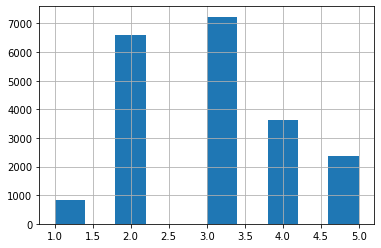

In [13]:
housing_data["income_cat"].hist()

Need to make sure the X-train data is similar to the housing data to make sure that it is accurate. The training set needs to have a similar approx. value as the full dataset.

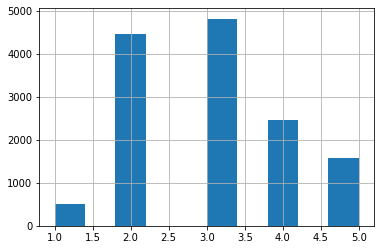

In [14]:
X_train['income_cat'].hist()

Stratification is defined as the act of sorting data, people, and objects into distinct groups or layers. It is a technique used in combination with other data analysis tools. When data from a variety of sources or categories have been lumped together, the meaning of the data can be difficult to see. 

In [15]:
#Stratified Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing_data,housing_data["income_cat"]):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

  train_set,test_set = train_test_split(housing_data,test_size=0.2,random_state=42)

  compare_props = pd.DataFrame({
      "Overall": income_cat_proportions(housing_data),
      "Stratified": income_cat_proportions(strat_test_set),
      "Random": income_cat_proportions(test_set),
  }).sort_index()
  compare_props["Rand.%error"]= 100* compare_props["Random"] / compare_props["Overall"]-100
  compare_props["Strat.%error"]= 100* compare_props["Stratified"] / compare_props["Overall"]-100

  compare_props
  

In [18]:
strat_train_set.drop("income_cat",axis="columns",inplace=True)
strat_test_set.drop("income_cat",axis="columns",inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbf95b9e10>,
      dtype=object)

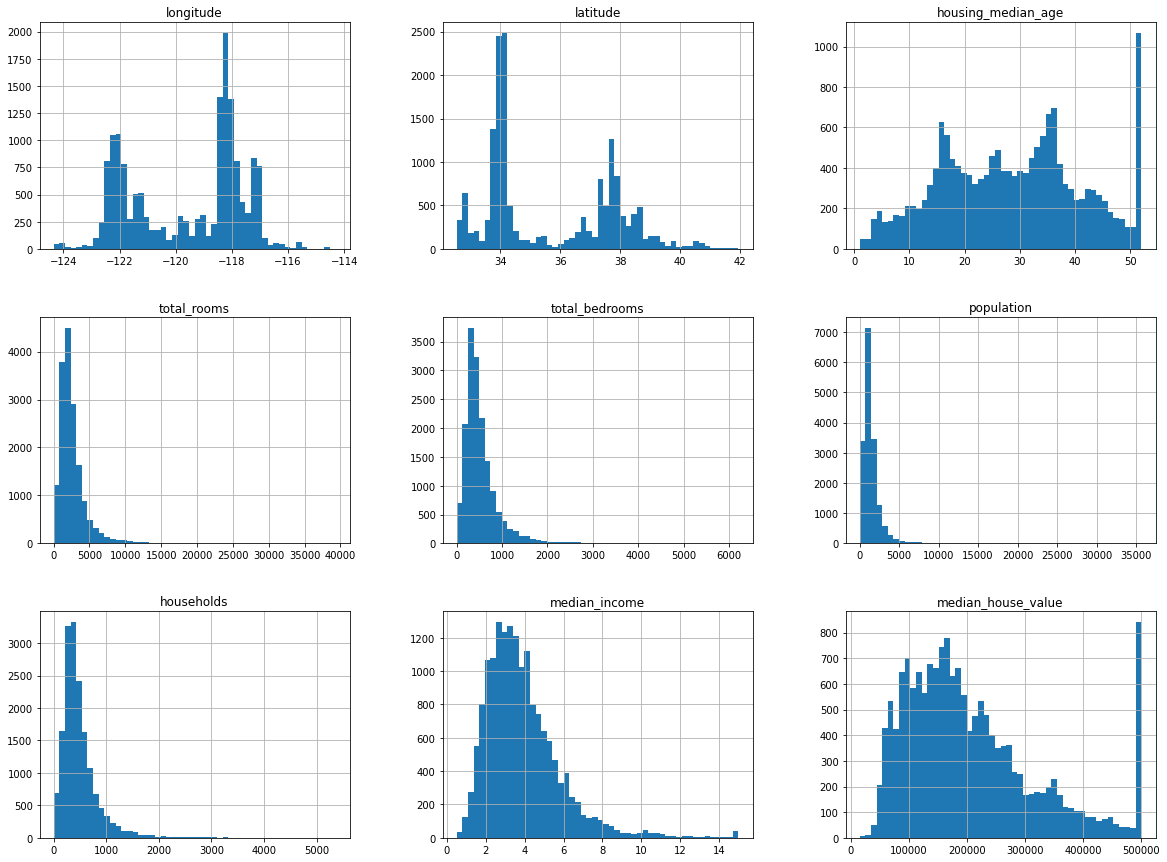

In [19]:
#Visualizing
import matplotlib.pyplot as plt
##Histogram
housing = strat_train_set.copy()
housing.hist(bins=50,figsize =(20,15))


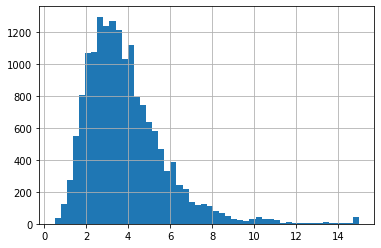

In [20]:
housing["median_income"].hist(bins=50)

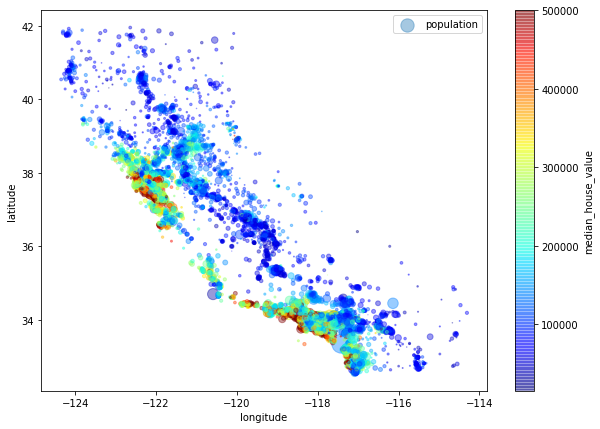

In [21]:
## Geographical data
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s = housing["population"]/100, label="population",figsize=(10,7),
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
             sharex=False)

In [22]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


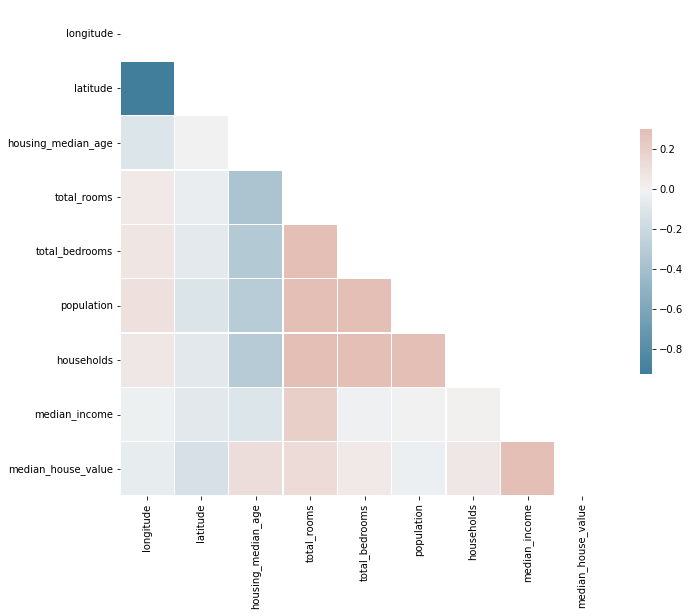

In [23]:
import seaborn as sns
corr = housing.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

f, ax = plt.subplots(figsize= (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=.3,center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink":.5})

**Preparing data for ML**
- Feature Engineering: Creating new features (colums) out of our raw data using domain knowledge
- Inputation: Inserting values where they might be missing to have a complete dataset
- Encoding Categorical Variables: Transforming categorical variables into some numerical variation.
-Scaling: Applying a scalar that transforms all of our data on the same numercial scale.

In [24]:
#preparing data for ML
#housing = strat_test_set.drop("median_house_value",axis = 1)
#housing_labels = strat_test_set("median_house_value").copy()

In [25]:
#dealing with missing values 
sample_incomplete_rows= housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,177000.0,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,146500.0,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,214800.0,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,500001.0,NEAR OCEAN


Dropping column with no values

In [26]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [27]:
#Dropping rows with no values
#sample_incomplete_rows.drop("total_bedrooms",axis =1)

In [28]:
#inputation method
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median,inplace=True) #Option3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,85000.0,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,177000.0,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,146500.0,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,214800.0,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,500001.0,NEAR OCEAN


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')
housing_num = housing.select_dtypes(include=(np.number))
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0


In [30]:
from sklearn import impute
imputer.fit(housing_num)
SimpleImputer(strategy='median')


SimpleImputer(strategy='median')

In [31]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0


In [32]:
imputer.strategy

'median'

Encode Categorical Variables
Converts a non-numerical data into a numerical data to create inferences. For ex. ocean_proximity could have a weight associated which can be used to infer median house values even if the data is non-numeric

In [33]:
housing_cat =housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Near The ocean is encoded as 0 vs the near rhe ocean is encoded as 4. It will help the machine learning algorithm to find correlations

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder= OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # creates a "dense array" meaning that all instances have a value not just thhe onces that are encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Feature Engineering
Feature engineering is the art/science of using the domain knowledge to create new features (columns) of data using the raw data. This can be ket to improving the performance of your machine learning models.

In [61]:
def feature_engineering(data):
  data['bedrooms_per_household'] = data['total_bedrooms']/data['households']
  data['population_per_households']=data['population']/data['households']
  data['rooms_per_households']=data['total_rooms']/data['households']

  return data
  

In [62]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_household,population_per_households,rooms_per_households
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,1.157685,2.411178,6.297405


#Scaling our Data
Many machine learning algorithms don't work well with unscaled data. For ex. the magnitude of values in the "total rooms" feature is going to be substantially higher that that in the "median_income" feature becuse the median income is scaled down by 1000. Because of this we usually will need to scale our value. There are multiple ways to accomplish this, and we willl use the standardScaler which will scale our values to their Z-score within their column like so 

Z= (x-u)/ s
where x is the value we are scaling, u is the mean value of the column, and s is standard deviation.

In this case, the longitude/latitude is smaller than the number of rooms. For that reason the algorithm will think to put a higher emphasis on the rooms rather than the longitude and lattitude. To avoid that the scaling is important.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

Combining all of the steps together. Pipeline

In [64]:
ml_input_data = np.hstack([housing_cat_1hot, housing_scaled])
ml_input_data

array([[ 0.        ,  1.        ,  0.        , ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 0.        ,  0.        ,  0.        , ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.        ,  1.        ,  0.        , ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [ 0.        ,  1.        ,  0.        , ...,  0.05505203,
         0.00657083,  0.01407228]])

Combining all of the steps together. Pipeline

In [65]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features


    


In [66]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

Transform our data using the "Pipeline" we created. 
We now need to create a clean training dataset to "train" our ML regressors, and a "test" set to test the accuracy of said regressors. Let's input our statified samples into our "pipelines"

#Select and Train Model

In [42]:
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
train_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [45]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_households',
 'rooms_per_households',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

##Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data,train_labels)

LinearRegression()

Comparing value of the linear regression with the original value

In [47]:
original_values = test_labels[:5]
predicted_values = lin_reg.predict(test_data[:5])
comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,421436.985982,78564.014018
17352,162500.0,288955.577066,-126455.577066
3505,204600.0,244465.297215,-39865.297215
7777,159700.0,195506.027223,-35806.027223
14155,184000.0,259951.750767,-75951.750767


In [48]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values,predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

78489.87096668076

In [49]:
# Bring in the Metrics

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

71328.5332577832

Decision Tree 

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data,train_labels)

DecisionTreeRegressor(random_state=42)

In [51]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Since the prediction is 0, this means the model was overfitted. So a crossvalidation is needed.
It seems our performance above was top notch. Instead of just splitting our data into a train and test set and training once, we can do something called K-Fold Cross-Validation which will split our training dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model.

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70819.83674558 70585.09139446 69861.50467212 73083.46385442
 66246.62162221 74093.76616605 77298.21284135 70265.05374821
 70413.46481703 72693.02785945]
Mean: 71536.00437208822
Standard deviation: 2802.723447985299


Random Forest Regressors

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [55]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18797.81343373367

Since the prediction is 18797, this means the model is much better. So a crossvalidation was done to verify the model was good. It seems our performance above was top notch. Instead of just splitting our data into a train and test set and training once, we can do something called K-Fold Cross-Validation which will split our training dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model.

In [56]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51667.47890087 49581.77674843 46845.77133522 52127.48739086
 48082.89639917 51050.84681689 53027.94987383 50218.59780997
 48609.03966622 54669.97457167]
Mean: 50588.18195131385
Standard deviation: 2273.9929947683154


FineTuning a model: After you pick a model or set of models that are promising, you'll need to fine-tune the hyperparameters (parameters of the model that aren't affected by training) in order to find the best ones to use for your model. You can use something called Grid Search in order to accomplish this.

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64441.33583774864 {'max_features': 2, 'n_estimators': 3}
55010.78729315784 {'max_features': 2, 'n_estimators': 10}
52756.90743676946 {'max_features': 2, 'n_estimators': 30}
60419.95105027927 {'max_features': 4, 'n_estimators': 3}
52548.760723492225 {'max_features': 4, 'n_estimators': 10}
50475.03023921768 {'max_features': 4, 'n_estimators': 30}
58658.87553276854 {'max_features': 6, 'n_estimators': 3}
51688.259845013825 {'max_features': 6, 'n_estimators': 10}
49602.83903888296 {'max_features': 6, 'n_estimators': 30}
57764.545176887186 {'max_features': 8, 'n_estimators': 3}
51906.606161086886 {'max_features': 8, 'n_estimators': 10}
49851.77165193962 {'max_features': 8, 'n_estimators': 30}
63137.43571927858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.40582754731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58195.29390064867 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52168.74519952844 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [71]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073206,0.002294,0.005184,0.000228,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.094088e+09,-3.701893e+09,...,-4.152686e+09,2.564139e+08,18,-1.120130e+09,-1.095790e+09,-1.132094e+09,-1.176269e+09,-1.121152e+09,-1.129087e+09,2.640853e+07
1,0.238626,0.002001,0.014033,0.000587,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.970210e+09,-2.920099e+09,...,-3.026187e+09,9.517266e+07,11,-5.710653e+08,-5.732697e+08,-5.938710e+08,-5.909882e+08,-5.970375e+08,-5.852464e+08,1.087131e+07
2,0.701817,0.006389,0.038787,0.000750,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.757089e+09,-2.695824e+09,...,-2.783291e+09,9.766273e+07,9,-4.345880e+08,-4.372516e+08,-4.355848e+08,-4.348115e+08,-4.407693e+08,-4.366010e+08,2.284079e+06
3,0.120623,0.003518,0.005129,0.000072,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.739305e+09,-3.453554e+09,...,-3.650570e+09,1.567023e+08,16,-1.033917e+09,-1.025859e+09,-9.509278e+08,-9.789355e+08,-9.988662e+08,-9.977011e+08,3.048182e+07
4,0.381888,0.004663,0.013603,0.000083,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.774614e+09,-2.715229e+09,...,-2.761372e+09,1.177235e+08,8,-5.106846e+08,-5.406298e+08,-5.039097e+08,-5.253607e+08,-5.336332e+08,-5.228436e+08,1.375091e+07
5,1.143933,0.012103,0.038691,0.001337,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.558975e+09,-2.443052e+09,...,-2.547729e+09,1.043837e+08,3,-3.851322e+08,-3.974866e+08,-3.849539e+08,-3.882619e+08,-3.934907e+08,-3.898651e+08,4.905561e+06
6,0.152751,0.003788,0.004953,0.000078,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.590876e+09,-3.341284e+09,...,-3.440864e+09,1.044087e+08,14,-9.127519e+08,-9.396161e+08,-8.570217e+08,-9.053142e+08,-9.165255e+08,-9.062459e+08,2.714946e+07
7,0.519552,0.005238,0.013388,0.000041,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.723446e+09,-2.593712e+09,...,-2.671676e+09,1.309912e+08,4,-4.900412e+08,-5.171047e+08,-4.779660e+08,-4.969112e+08,-5.094824e+08,-4.983011e+08,1.387280e+07
8,1.575891,0.011022,0.038345,0.001546,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.472257e+09,-2.369335e+09,...,-2.460442e+09,9.252659e+07,1,-3.740409e+08,-3.831060e+08,-3.835964e+08,-3.687507e+08,-3.818289e+08,-3.782646e+08,5.880922e+06
9,0.202029,0.003672,0.004967,0.000058,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.344547e+09,-3.154085e+09,...,-3.336743e+09,9.768474e+07,12,-8.541704e+08,-9.124260e+08,-9.442119e+08,-8.793192e+08,-8.832932e+08,-8.946842e+08,3.090299e+07


Randomized Search
Randomized search allows you to more easily find the hyperparameters that we're interested in because instead of searching through all possible combinations, it randomly picks a couple and tries those out.

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbbf1089690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbbf10896d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [73]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48881.00597871309 {'max_features': 7, 'n_estimators': 180}
51634.61963021687 {'max_features': 5, 'n_estimators': 15}
50312.55245794906 {'max_features': 3, 'n_estimators': 72}
50952.54821857023 {'max_features': 5, 'n_estimators': 21}
49063.34454115586 {'max_features': 7, 'n_estimators': 122}
50317.63324666772 {'max_features': 3, 'n_estimators': 75}
50173.504527094505 {'max_features': 3, 'n_estimators': 88}
49248.29804214526 {'max_features': 5, 'n_estimators': 100}
50054.94886918995 {'max_features': 3, 'n_estimators': 150}
64847.94779269648 {'max_features': 5, 'n_estimators': 2}


In [74]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.46978272e-02, 7.69983975e-02, 4.08715796e-02, 1.67325719e-02,
       1.71418340e-02, 1.73518185e-02, 1.56303531e-02, 3.39824215e-01,
       2.30528104e-02, 1.04033701e-01, 8.64983594e-02, 1.29273143e-02,
       1.54663950e-01, 7.22217547e-05, 3.62205279e-03, 5.88099358e-03])

Feature Importance List
Judging the importance of various features is very important as this allows us to explain to our stakeholders which feature is most important and why which is becomeing more important as more advanced models behave like blackboxes.

In [75]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.0846978271965227),
 ('latitude', 0.07699839747855737),
 ('housing_median_age', 0.040871579612884096),
 ('total_rooms', 0.016732571900462085),
 ('total_bedrooms', 0.01714183399184058),
 ('population', 0.0173518184721046),
 ('households', 0.015630353131298083),
 ('median_income', 0.3398242154869636),
 ('bedrooms_per_household', 0.023052810363875926),
 ('population_per_households', 0.10403370064780083),
 ('rooms_per_households', 0.08649835942626646),
 ('<1H OCEAN', 0.012927314349565632),
 ('INLAND', 0.15466394981681342),
 ('ISLAND', 7.222175467748088e-05),
 ('NEAR BAY', 0.003622052794433035),
 ('NEAR OCEAN', 0.005880993575933964)]

<BarContainer object of 16 artists>

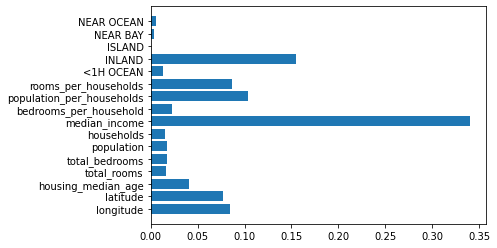

In [76]:
plt.barh(y=features, width=feature_importances.tolist())

Selecting out final model

In [77]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [78]:
final_rmse

63301.179203602675

Based on this model, medium house hould income and location of the house (longitude and Lattitude) is the most parameter. 